In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [25]:
files = dict(
    covmax='/Users/alex/Documents/Work/UWyo/Research/Flux Pipeline Project/Eddypro-ec-testing/workflows/basic_python/output/eddypro_covariance-maximization_full_output_2023-09-12T161059_adv.csv',
    covmaxdef='/Users/alex/Documents/Work/UWyo/Research/Flux Pipeline Project/Eddypro-ec-testing/workflows/basic_python/output/eddypro_covariance-maximization-with-default_full_output_2023-09-12T161539_adv.csv',
    none='/Users/alex/Documents/Work/UWyo/Research/Flux Pipeline Project/Eddypro-ec-testing/workflows/basic_python/output/eddypro_none_full_output_2023-09-12T162016_adv.csv',
    manual='/Users/alex/Documents/Work/UWyo/Research/Flux Pipeline Project/Eddypro-ec-testing/workflows/basic_python/output/eddypro_manual_full_output_2023-09-12T160619_adv.csv',
)

dfs = []
for k, v in files.items():
    df = pd.read_csv(v, parse_dates=[['date','time']], skiprows=[0, 2], na_values=-9999.0)
    df['name'] = k
    df = df.reset_index()
    if k != 'manual':
        dfs.append(df)
df = pd.concat(dfs)
# df.co2_ti

Text(0, 0.5, 'error when from covmax with default')

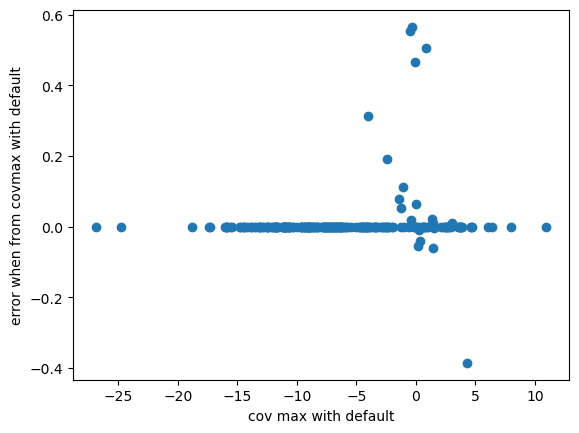

In [48]:
plt.scatter(df.query('name == "covmaxdef"').co2_flux, df.query('name == "covmaxdef"').co2_flux - df.query('name == "covmax"').co2_flux)
plt.xlabel('cov max with default')
plt.ylabel('error when from covmax with default')

SyntaxError: unterminated string literal (detected at line 1) (<unknown>, line 1)

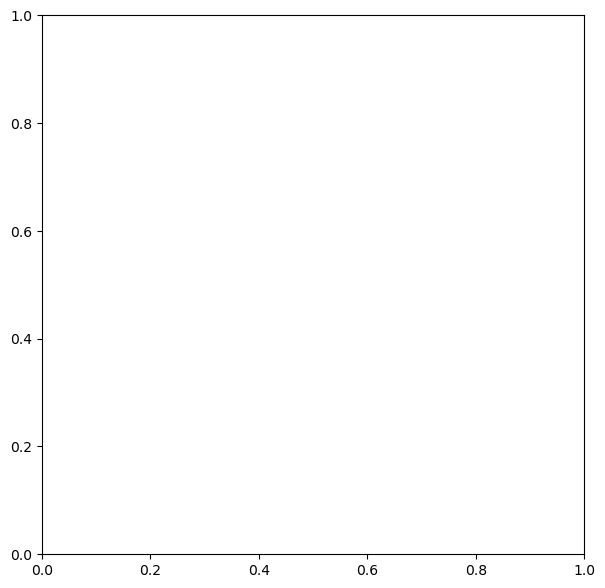

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
i = 0
for name, idf in df.groupby('name'):
    color = f'C{i}'
    i += 1
    plt.scatter(stats.norm.rvs(idf.co2_time_lag, 0.02), idf.co2_flux, label=name, s=10)
    
    # idf.plot('co2_time_lag', 'co2_flux', kind='scatter', label=name, ax=ax, c=color)
plt.legend()